In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature
import xarray as xr
%config InlineBackend.figure_format = 'retina'

xr_df = xr.open_dataset('data/gistemp1200_GHCNv4_ERSSTv5.nc')

In [119]:
xr_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, nv: 2, time: 1692)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2020-12-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] 1880-01-01 1880-02-01 ... 2021-01-01
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2021-01-07 11:59:03 by SBBX_to_nc 2.0 - ILAND=1200,...

In [3]:
climate = xr_df.resample(time='Y').mean()

anomaly = climate['tempanomaly']

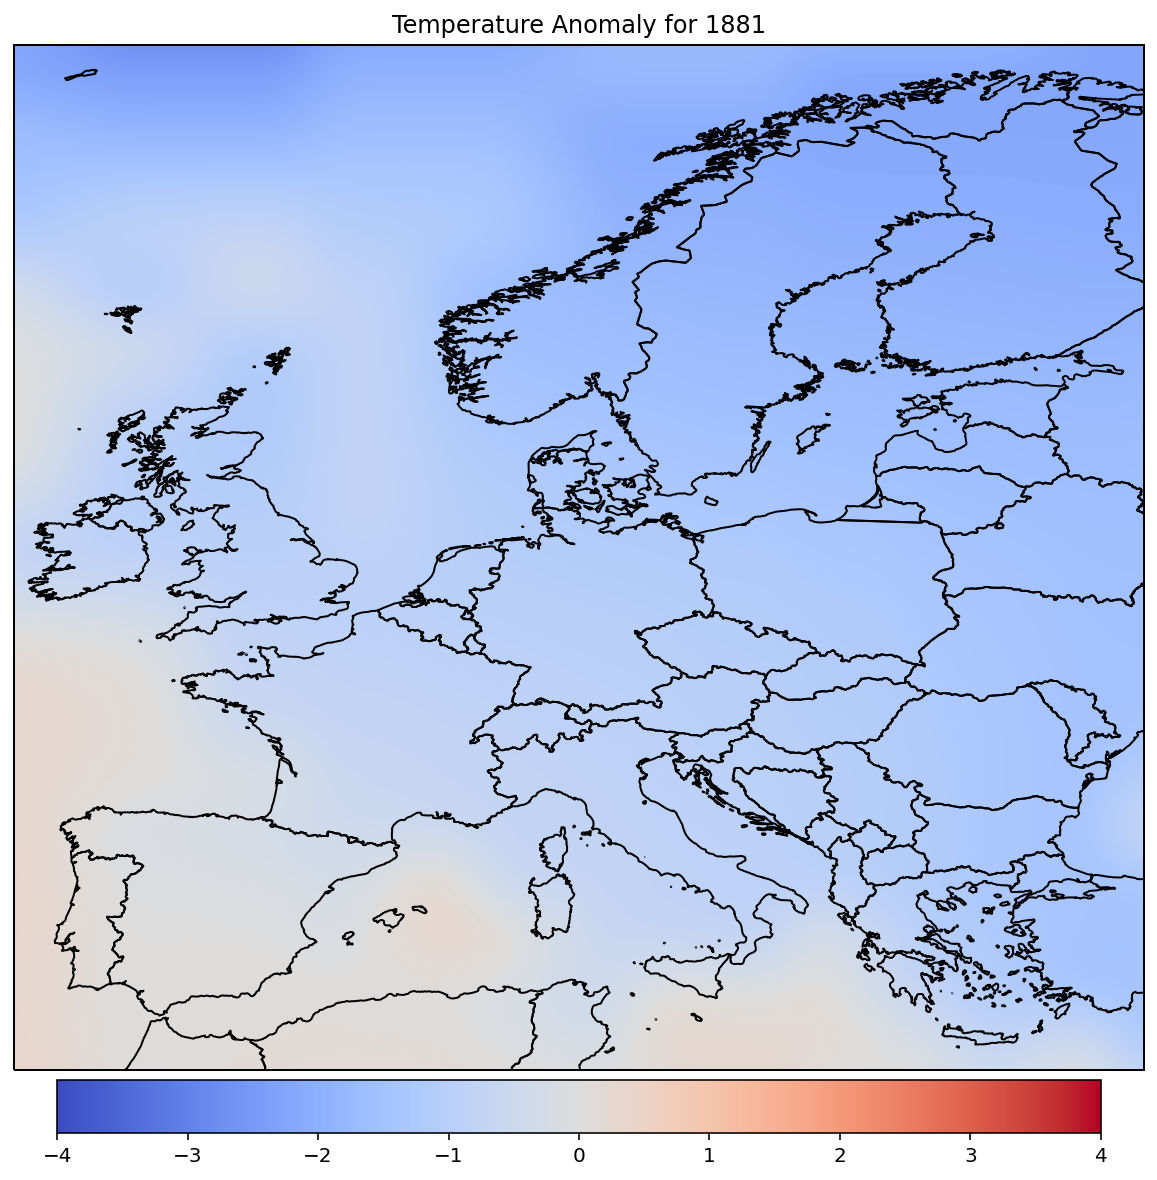

In [126]:
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')
ax.set_extent([-11, 31, 34, 71])

i=1
date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
ax.set_title("Temperature Anomaly for "+ str(date.year))
xr.plot.imshow(anomaly.isel(time=i), ax=ax, add_labels=False,
                   vmin=-4, vmax=4, cmap='coolwarm',
                   cbar_kwargs=cbar_kwargs, interpolation='bicubic')

plt.show()


In [128]:
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.048,
    'pad': 0.01,
    'extend':'neither'
}


for i in range(anomaly.shape[0]):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())
    ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                           facecolor='none', edgecolor='black')
    ax.set_extent([-11, 31, 34, 71])

    date =  pd.to_datetime(anomaly.isel(time=i)['time'].values)
    ax.set_title("Temp Anomaly for "+ str(date.year))
    xr.plot.imshow(anomaly.isel(time=i), ax=ax, add_labels=False,
                       vmin=-4, vmax=4, cmap='coolwarm',
                       cbar_kwargs=cbar_kwargs, interpolation='bicubic')
    plt.savefig('img/temp_'+str(date.year)+'.png', bbox_inches='tight', dpi=150)
    plt.close()
